<a href="https://colab.research.google.com/github/viscoss/system_quality_project/blob/main/notebooks/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [96]:
import warnings
warnings.filterwarnings(action='ignore')

In [97]:
train_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/train_err_data.csv')
train_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/train_quality_data.csv')
train_prob = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/train_problem_data.csv')

In [98]:
test_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/test_err_data.csv')
test_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/test_quality_data.csv')

In [99]:
# 영수 조장님께서 코드를 구현해주신 덕분에 올릴 수 있게 되었습니다. 감사합니다. (_ _)
# train_err의 user_id 컬럼과 train_prod의 user_id 컬럼의 상관성을 알아보려 했습니다.


train_err['user_id'].value_counts()

24934    222186
20546    195538
15570    175730
20352     83680
11041     66093
          ...  
20099         1
21960         1
21076         1
20618         1
13525         1
Name: user_id, Length: 15000, dtype: int64

In [101]:
# 그래서 train_prob의 user_id 중 불만접수 횟수가 2회 이상인 user_id를 알아보았습니다. 

train_prob['user_id'].value_counts() > 1

24407     True
11016     True
11528     True
15134     True
24138     True
         ...  
15539    False
23882    False
19729    False
22203    False
18822    False
Name: user_id, Length: 5000, dtype: bool

In [102]:
# 최다 불만접수는 5회였습니다.  
tmp1 = train_prob['user_id'].value_counts()[train_prob['user_id'].value_counts() > 1]

In [78]:

tmp1

24407    5
11016    4
11528    4
15134    4
24138    4
        ..
16220    2
11202    2
18561    2
20609    2
23944    2
Name: user_id, Length: 375, dtype: int64

In [75]:
tmp2 = train_err['user_id'].value_counts()[train_err['user_id'].value_counts() > 1]

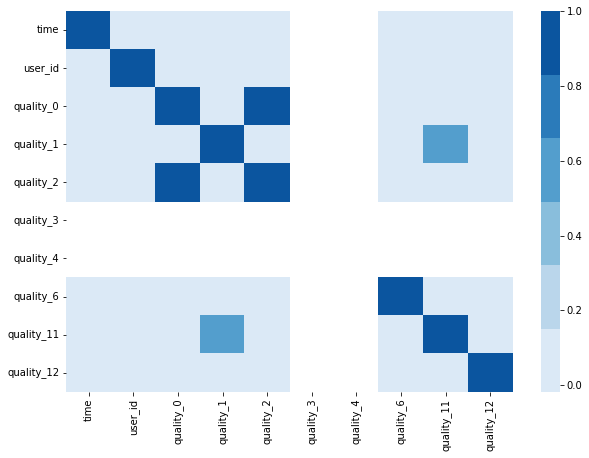

In [103]:
corr = train_qual.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [104]:

err_merge = pd.merge(tmp1, tmp2, left_index=True, right_index=True, how='left')

In [84]:
# 에러의 발생 수와 신고 횟수는 비례하지 않았습니다. 
err_merge

,user_id_x,user_id_y
24407,5,1910
11016,4,607
11528,4,544
15134,4,1201
24138,4,564
...,...,...
16220,2,2602
11202,2,771
18561,2,1322
20609,2,798


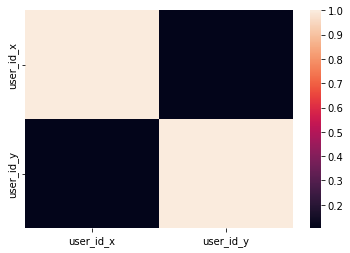

In [83]:
err_corr = err_merge.corr()
sns.heatmap(err_corr)

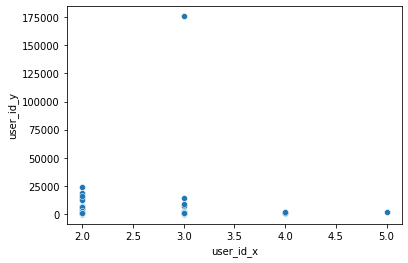

In [85]:
sns.scatterplot(x='user_id_x',y='user_id_y',data=err_merge)  
# 175000번의 에러에 3회만을 접수한 아웃라이어가 존재합니다. 제거하는게 맞지 않을까 합니다. 

In [92]:
err_merge = err_merge[~(err_merge['user_id_y'] > 150000)]

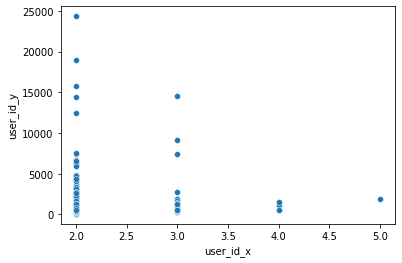

In [93]:
# 아웃라이어를 제거해보았습니다.
# 결론1. 175000번의 에러가 나온 데이터는 지우는게 맞지 않을까요?
# 결론2. 에러 횟수와 불만접수 수는 비례하지 않습니다. 
sns.scatterplot(x='user_id_x',y='user_id_y',data=err_merge)
